# Initial Explore


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of nlp.csv')

In [ ]:

# CAUTI - Catheter-associated Urinary Tract Infection
cauti_keywords = [
    'cauti',
    'urinary tract infection',
    'bladder infection',
    'catheter infection',
    'urethra infection',
    'urinary infection',
    'urosepsis',
    'cystitis',
    'urethritis',
    'urinary catheter',
    'urine culture positive'
]

# CLABSI - Central Line-associated Bloodstream Infection
clabsi_keywords = [
    'clabsi',
    'iv infection',
    'bloodstream infection',
    'central line infection',
    'intravenous catheter infection',
    'vascular catheter infection',
    'line sepsis',
    'central venous catheter infection',
    'bacteremia',
    'septicemia',
    'line-related infection',
    'picc line infection'
]

# VAP - Ventilator-associated Pneumonia
vap_keywords = [
    'vap',
    'ventilator-associated pneumonia',
    'ventilator infection',
    'lung infection',
    'respiratory infection',
    'mechanical ventilator pneumonia',
    'pulmonary infection',
    'bronchitis',
    'aspiration pneumonia',
    'intubation pneumonia',
    'respirator-associated fever'
]

def categorize_text(text):
    if any(keyword in text.lower() for keyword in cauti_keywords):
        return 'CAUTI'
    elif any(keyword in text.lower() for keyword in clabsi_keywords):
        return 'CLABSI'
    elif any(keyword in text.lower() for keyword in vap_keywords):
        return 'VAP'
    else:
        return 'Other'

df['HAI_category'] = df['text'].apply(lambda x: categorize_text(x))

print(df)



        subject_id                                               text  \
0         11968004  EXAMINATION:  CHEST (PA AND LAT)\n\nINDICATION...   
1         14993854  INDICATION:  ___ year old man with C5-C6 parap...   
2         10450845  HISTORY:  Fever and night sweats, to assess fo...   
3         11463808  HISTORY:  For ET tube placement.\n\nFINDINGS: ...   
4         12344136  EXAMINATION:  CT ABD AND PELVIS WITH CONTRAST\...   
...            ...                                                ...   
466890    14303191  INDICATION:  A ___ female with two days of nau...   
466891    16893819  EXAMINATION:  CT ABD AND PELVIS WITH CONTRAST\...   
466892    15942934  INDICATION:  ___ status post fall in early ___...   
466893    13475033  EXAMINATION:\nChest:  Frontal and lateral view...   
466894    11230452  HISTORY:  ___ man with lymphoma.  Patient has ...   

       HAI_category  
0             Other  
1             Other  
2             Other  
3             Other  
4            

In [ ]:


# Drop duplicate rows based on 'subject_id' and 'HAI_category'
unique_df = df.drop_duplicates(subset=['subject_id', 'HAI_category'])

# Count the number of unique patients for each category
unique_counts = unique_df['HAI_category'].value_counts()

print(unique_counts)


Other     107344
CAUTI      11181
VAP         3879
CLABSI      2859
Name: HAI_category, dtype: int64


In [ ]:
import pandas as pd
hai_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HAI_positive_patients.csv')

In [ ]:
hai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569 entries, 0 to 5568
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject_id  5569 non-null   int64  
 1   hadm_id     5569 non-null   int64  
 2   stay_id     3415 non-null   float64
 3   icd_code    5569 non-null   object 
 4   long_title  5569 non-null   object 
 5   HAI_Type    5569 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 261.2+ KB


In [ ]:

# Convert 'subject_id' column to sets
set_nlp = set(dfh['hadm_id'])
set_icd = set(hai_df['hadm_id'])

# Find intersection of the two sets
matching_patients = set_nlp.intersection(set_icd)

# Get the number of matching unique patients
num_matching_patients = len(matching_patients)

print(f"Number of matching unique patients: {num_matching_patients}")
print(f"Matching patient IDs: {matching_patients}")


Number of matching unique patients: 3881
Matching patient IDs: {25280516, 27844613, 27680781, 28958740, 24723481, 26492956, 22552604, 20340766, 24248353, 27738145, 21119010, 29343780, 22724644, 28082214, 28106791, 29876264, 28868649, 22364202, 26288170, 25247780, 25788461, 21397551, 26951728, 27820081, 21282867, 22356021, 28581942, 20070455, 27615292, 22732862, 28516422, 29401161, 24248394, 23126093, 22487118, 24027214, 27361362, 26107987, 23707730, 27230299, 23216220, 22069341, 26746975, 25854047, 27000935, 27705448, 21192811, 28164203, 23249005, 22585455, 26361968, 24748146, 25952371, 27164788, 28000373, 21930104, 21061754, 24936571, 25919612, 23625853, 24625278, 28713093, 28672136, 29745291, 27500684, 20766861, 22347918, 27615376, 28467347, 24854677, 29130902, 28819606, 24068247, 22610073, 20635802, 23126169, 29810839, 21348509, 27230365, 21758109, 22585506, 21733539, 20127907, 26157220, 20652197, 23650472, 23412904, 29335724, 28459182, 24887472, 20439218, 23945395, 29950133, 222906

In [ ]:
# Extracting unique subject_ids for each HAI category
clabsi_subject_ids = df[df['HAI_category'] == 'CLABSI']['subject_id'].unique().tolist()
cauti_subject_ids = df[df['HAI_category'] == 'CAUTI']['subject_id'].unique().tolist()
vap_subject_ids = df[df['HAI_category'] == 'VAP']['subject_id'].unique().tolist()

print("CLABSI IDs:", clabsi_subject_ids)
print("CAUTI IDs:", cauti_subject_ids)
print("VAP IDs:", vap_subject_ids)

CLABSI IDs: [16475384, 13363149, 10246901, 15499728, 16779219, 13188542, 13965901, 16236619, 18396814, 15391597, 17981124, 18459951, 12931403, 14080545, 15271097, 13983067, 16755974, 18615743, 17559795, 10259847, 14442953, 14213799, 15238743, 18421025, 14461528, 13587298, 13681398, 14459159, 16917696, 17876390, 12800941, 11069432, 11110258, 16825533, 16821077, 19151884, 13313976, 12503168, 12298456, 10036942, 14594997, 10013700, 17813402, 19891107, 18585855, 19671332, 19666541, 19868580, 15578020, 13766608, 17386656, 18651212, 16275349, 17966508, 13433085, 17609299, 17259809, 12752336, 14660006, 12747817, 14910600, 13010423, 19264268, 11813577, 12419783, 14164281, 11053863, 10016084, 17775768, 12047060, 17277684, 11338960, 18722214, 15891708, 10739652, 18043340, 18009599, 19642954, 13646177, 15202542, 13452947, 17414848, 10229778, 12781657, 13994771, 15638070, 11732249, 17679044, 12234568, 12156576, 15136878, 17370015, 17041034, 14217658, 12415528, 13896766, 12455327, 13043906, 1065387

In [ ]:

# Convert each list of IDs to a DataFrame with HAI category
df_clabsi = pd.DataFrame(clabsi_subject_ids, columns=['subject_id'])
df_clabsi['HAI_type'] = 'CLABSI'

df_cauti = pd.DataFrame(cauti_subject_ids, columns=['subject_id'])
df_cauti['HAI_type'] = 'CAUTI'

df_vap = pd.DataFrame(vap_subject_ids, columns=['subject_id'])
df_vap['HAI_type'] = 'VAP'

# Concatenate the DataFrames
df_combined = pd.concat([df_clabsi, df_cauti, df_vap], axis=0)

# Export to CSV
df_combined.to_csv('HAI_subject_ids.csv', index=False)


In [ ]:
from google.cloud import bigquery

project_id = 'physionet-data-395322' # Replace with your GCP project ID when running

client = bigquery.Client(project=project_id)

sql = """
SELECT
  subject_id,
  hadm_id,
  text
FROM
  `physionet-data.mimiciv_note.radiology`
WHERE
  REGEXP_CONTAINS(LOWER(text), r'(cauti|vap|clabsi|infection|bacterial|viral|catheter|ventilator|iv line|surgery|sepsis|inflammation|antibiotic)')
"""

query_job = client.query(sql)

# Load the results into a Pandas DataFrame.
dfh = query_job.to_dataframe()

dfh.head()


RefreshError: ignored

In [ ]:

# CAUTI - Catheter-associated Urinary Tract Infection
cauti_keywords = [
    'cauti',
    'urinary tract infection',
    'bladder infection',
    'catheter infection',
    'urethra infection',
    'urinary infection',
    'urosepsis',
    'cystitis',
    'urethritis',
    'urinary catheter',
    'urine culture positive'
]

# CLABSI - Central Line-associated Bloodstream Infection
clabsi_keywords = [
    'clabsi',
    'iv infection',
    'bloodstream infection',
    'central line infection',
    'intravenous catheter infection',
    'vascular catheter infection',
    'line sepsis',
    'central venous catheter infection',
    'bacteremia',
    'septicemia',
    'line-related infection',
    'picc line infection'
]

# VAP - Ventilator-associated Pneumonia
vap_keywords = [
    'vap',
    'ventilator-associated pneumonia',
    'ventilator infection',
    'lung infection',
    'respiratory infection',
    'mechanical ventilator pneumonia',
    'pulmonary infection',
    'bronchitis',
    'aspiration pneumonia',
    'intubation pneumonia',
    'respirator-associated fever'
]

def categorize_text(text):
    if any(keyword in text.lower() for keyword in cauti_keywords):
        return 'CAUTI'
    elif any(keyword in text.lower() for keyword in clabsi_keywords):
        return 'CLABSI'
    elif any(keyword in text.lower() for keyword in vap_keywords):
        return 'VAP'
    else:
        return 'Other'

dfh['HAI_category'] = dfh['text'].apply(lambda x: categorize_text(x))

print(dfh)



        subject_id   hadm_id  \
0         14923562  23365149   
1         14295224  26322817   
2         15171624  25142670   
3         10578325  20206823   
4         11619087  24459100   
...            ...       ...   
405934    10979480      <NA>   
405935    15245907      <NA>   
405936    13158454      <NA>   
405937    17340686      <NA>   
405938    13865397      <NA>   

                                                     text HAI_category  
0       EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATIO...        Other  
1       EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATIO...        Other  
2       REASON FOR EXAM:  ___ man with chest radiograp...        Other  
3       EXAMINATION:  CHEST PORT. LINE PLACEMENT\n\nIN...        Other  
4       INDICATION:  ___ year old woman with UTI, like...        Other  
...                                                   ...          ...  
405934  PA AND LATERAL VIEWS OF THE CHEST\n\nREASON FO...        Other  
405935  INDICATION:  Routine ex

In [ ]:


# Drop duplicate rows based on 'subject_id' and 'HAI_category'
unique_dfh = dfh.drop_duplicates(subset=['hadm_id', 'HAI_category'])

# Count the number of unique patients for each category
unique_counts = unique_dfh['HAI_category'].value_counts()

print(unique_counts)


Other     118273
CAUTI       7969
CLABSI      2872
VAP         2609
Name: HAI_category, dtype: int64


In [ ]:
# Filter the dataframe to exclude rows with the 'Other' category
filtered_dfh = dfh[dfh['HAI_category'] != 'Other']

# Drop duplicate rows based on 'hadm_id'
unique_dfh = filtered_dfh.drop_duplicates(subset=['hadm_id'])

# Save the DataFrame to a CSV with only 'hadm_id', 'subject_id', and 'HAI_category' columns
unique_dfh[['hadm_id', 'subject_id', 'HAI_category']].to_csv('unique_HAI_categories_.csv', index=False)


# Discharge_TEXT

In [ ]:
!pip install --upgrade google-cloud-bigquery[pandas]

from google.colab import auth
auth.authenticate_user()


In [ ]:
from google.cloud import bigquery

project_id = 'physionet-data-395322' # Replace with your GCP project ID

client = bigquery.Client(project=project_id)

sql = """
SELECT
  subject_id,
  hadm_id,
  text
FROM
  `physionet-data.mimiciv_note.discharge`
WHERE
  REGEXP_CONTAINS(LOWER(text), r'(cauti|vap|clabsi|infection|bacterial|viral|catheter|ventilator|iv line|surgery|sepsis|inflammation|antibiotic)')
"""

query_job = client.query(sql)

# Load the results into a Pandas DataFrame.
df = query_job.to_dataframe()

df.head()


,subject_id,hadm_id,text
0,12054391,24153026,\nName: ___ Unit No: ___...
1,12119271,27021523,\nName: ___ Unit No: ___\n ...
2,12121645,22927809,\nName: ___ Unit No: ___\n \...
3,12174693,24617832,\nName: ___ Unit No: ___\n \n...
4,12656773,23452358,\nName: ___ Unit No: __...


In [ ]:

# CAUTI - Catheter-associated Urinary Tract Infection
cauti_keywords = [
    'cauti',
    'urinary tract infection',
    'bladder infection',
    'catheter infection',
    'urethra infection',
    'urethritis',
    'urinary catheter',
    'urine culture positive'
]

# CLABSI - Central Line-associated Bloodstream Infection
clabsi_keywords = [
    'clabsi',
    'iv infection',
    'bloodstream infection',
    'central line infection',
    'intravenous catheter infection',
    'vascular catheter infection',
    'line sepsis',
    'central venous catheter infection',
    'bacteremia',
    'septicemia',
    'line-related infection',
    'picc line infection'
]

# VAP - Ventilator-associated Pneumonia
vap_keywords = [
    'vap',
    'ventilator-associated pneumonia',
    'ventilator infection',
    'respiratory infection',
    'mechanical ventilator pneumonia',
    'pulmonary infection',
    'bronchitis',
    'aspiration pneumonia',
    'intubation pneumonia',
    'respirator-associated fever'
]

def categorize_text(text):
    if any(keyword in text.lower() for keyword in cauti_keywords):
        return 'CAUTI'
    elif any(keyword in text.lower() for keyword in clabsi_keywords):
        return 'CLABSI'
    elif any(keyword in text.lower() for keyword in vap_keywords):
        return 'VAP'
    else:
        return 'Other'

df['HAI_category'] = df['text'].apply(lambda x: categorize_text(x))

print(df)



        subject_id   hadm_id  \
0         12054391  24153026   
1         12119271  27021523   
2         12121645  22927809   
3         12174693  24617832   
4         12656773  23452358   
...            ...       ...   
287992    11206221  23604317   
287993    11452999  29209225   
287994    10706377  29551518   
287995    10866343  23226598   
287996    11107985  21601311   

                                                     text HAI_category  
0        \nName:  ___                   Unit No:   ___...        Other  
1        \nName:  ___                Unit No:   ___\n ...          VAP  
2        \nName:  ___               Unit No:   ___\n \...        Other  
3        \nName:  ___              Unit No:   ___\n \n...        Other  
4        \nName:  ___                    Unit No:   __...        Other  
...                                                   ...          ...  
287992   \nName:  ___               Unit No:   ___\n \...        Other  
287993   \nName:  ___          

In [ ]:


# Drop duplicate rows based on 'subject_id' and 'HAI_category'
unique_df = df.drop_duplicates(subset=['hadm_id', 'HAI_category'])

# Count the number of unique patients for each category
unique_counts = unique_df['HAI_category'].value_counts()

print(unique_counts)


Other     215603
CAUTI      45026
CLABSI     14299
VAP        13069
Name: HAI_category, dtype: int64


In [ ]:


# Drop duplicate rows based on 'subject_id' and 'HAI_category'
uunique_df = df.drop_duplicates(subset=['subject_id', 'HAI_category'])

# Count the number of unique patients for each category
uunique_counts = uunique_df['HAI_category'].value_counts()

print(uunique_counts)


Other     111269
CAUTI      31057
VAP         9581
CLABSI      7897
Name: HAI_category, dtype: int64


In [ ]:
unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287997 entries, 0 to 287996
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   subject_id    287997 non-null  Int64 
 1   hadm_id       287997 non-null  Int64 
 2   text          287997 non-null  object
 3   HAI_category  287997 non-null  object
dtypes: Int64(2), object(2)
memory usage: 11.5+ MB


In [ ]:
# Filter the dataframe to exclude rows with the 'Other' category
filtered_dfh = unique_df[unique_df['HAI_category'] != 'Other']

# Drop duplicate rows based on 'hadm_id'
unique_dfh = filtered_dfh.drop_duplicates(subset=['hadm_id'])

# Save the DataFrame to a CSV with only 'hadm_id', 'subject_id', and 'HAI_category' columns
unique_dfh[['hadm_id', 'subject_id', 'HAI_category']].to_csv('unique_HAI_categories_discharge.csv', index=False)


# Straight Approach

In [ ]:
#!pip install --upgrade google-cloud-bigquery[pandas]

from google.colab import auth
auth.authenticate_user()


In [ ]:
from google.cloud import bigquery

project_id = 'physionet-data-395322' # Replace with your GCP project ID

client = bigquery.Client(project=project_id)

sql = """
SELECT
  subject_id,
  hadm_id,
  text
FROM
  `physionet-data.mimiciv_note.discharge`
WHERE
  REGEXP_CONTAINS(LOWER(text), r'(cauti|catheter infection|catheter urinary infection|catheter-associated infection|catheter associated infection)')
"""

query_job = client.query(sql)

# Load the results into a Pandas DataFrame.
df_cauti = query_job.to_dataframe()

df_cauti.head()


,subject_id,hadm_id,text
0,10031687,25653917,\nName: ___ Unit No: ___\n ...
1,10044189,22028605,\nName: ___ Unit No: ___\n...
2,10556676,22783191,\nName: ___ Unit No: _...
3,10650001,23495442,\nName: ___ Unit No: ___\n ...
4,10998936,20594211,\nName: ___ Unit No: ___\n ...


In [ ]:
df_cauti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  25247 non-null  Int64 
 1   hadm_id     25247 non-null  Int64 
 2   text        25247 non-null  object
dtypes: Int64(2), object(1)
memory usage: 641.2+ KB


In [ ]:
from google.cloud import bigquery

project_id = 'physionet-data-395322' # Replace with your GCP project ID

client = bigquery.Client(project=project_id)

sql = """
SELECT
  subject_id,
  hadm_id,
  text
FROM
  `physionet-data.mimiciv_note.discharge`
WHERE
  REGEXP_CONTAINS(LOWER(text), r'(vap|ventilator-associated pneumonia|ventilator related pneumonia|ventilator-acquired pneumonia)')
"""

query_job = client.query(sql)

# Load the results into a Pandas DataFrame.
df_vap = query_job.to_dataframe()

df_vap.head()


,subject_id,hadm_id,text
0,10507052,29447084,\nName: ___ Unit No: ___\n ...
1,10990398,27541056,\nName: ___ Unit No: __...
2,13273198,28179193,\nName: ___ Unit No: ___\...
3,13787477,23944720,\nName: ___ Unit No: _...
4,13940963,27156945,\nName: ___ Unit No: ___\n \n...


In [ ]:
df_vap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3227 entries, 0 to 3226
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  3227 non-null   Int64 
 1   hadm_id     3227 non-null   Int64 
 2   text        3227 non-null   object
dtypes: Int64(2), object(1)
memory usage: 82.1+ KB


In [ ]:
from google.cloud import bigquery

project_id = 'physionet-data-395322' # Replace with your GCP project ID

client = bigquery.Client(project=project_id)

sql = """
SELECT
  subject_id,
  hadm_id,
  text
FROM
  `physionet-data.mimiciv_note.discharge`
WHERE
  REGEXP_CONTAINS(LOWER(text), r'(line infection|picc line infection|iv infection|line associated bloodstream infection|clabsi|central line infection|central line associated infection|line-associated infection|central venous infection|line sepsis|line related infection)')
"""

query_job = client.query(sql)

# Load the results into a Pandas DataFrame.
df_clabsi = query_job.to_dataframe()

df_clabsi.head()


,subject_id,hadm_id,text
0,11372027,28169852,\nName: ___ Unit No: ___\n \...
1,10121453,21172289,\nName: ___ Unit No: ___\n...
2,10922223,29309318,\nName: ___ Unit No: ___\...
3,14221997,22130779,\nName: ___ Unit No: _...
4,14874510,26640064,\nName: ___ Unit No: ___\n...


In [ ]:
df_clabsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  2997 non-null   Int64 
 1   hadm_id     2997 non-null   Int64 
 2   text        2997 non-null   object
dtypes: Int64(2), object(1)
memory usage: 76.2+ KB


In [ ]:
import pandas as pd
# Add the 'HAI_category' column to each dataframe
df_cauti['HAI_category'] = 'CAUTI'
df_vap['HAI_category'] = 'VAP'
df_clabsi['HAI_category'] = 'CLABSI'

# Concatenate the dataframes
df_merged_hais = pd.concat([df_cauti, df_vap, df_clabsi], ignore_index=True)

df_merged_hais.head()


,subject_id,hadm_id,text,HAI_category
0,10031687,25653917,\nName: ___ Unit No: ___\n ...,CAUTI
1,10044189,22028605,\nName: ___ Unit No: ___\n...,CAUTI
2,10556676,22783191,\nName: ___ Unit No: _...,CAUTI
3,10650001,23495442,\nName: ___ Unit No: ___\n ...,CAUTI
4,10998936,20594211,\nName: ___ Unit No: ___\n ...,CAUTI


In [ ]:
# Group by hadm_id and HAI_category and count unique hadm_ids for each category
category_distribution = df_merged_hais.groupby('HAI_category')['hadm_id'].nunique()

# Total unique hadm_ids in the dataframe
total_unique_hadm_ids = df_merged_hais['hadm_id'].nunique()

print(f"Total unique hadm_ids: {total_unique_hadm_ids}")
print("\nDistribution of unique hadm_ids among HAI categories:")
print(category_distribution)


Total unique hadm_ids: 30803

Distribution of unique hadm_ids among HAI categories:
HAI_category
CAUTI     25247
CLABSI     2997
VAP        3227
Name: hadm_id, dtype: int64


In [ ]:
df_merged_hais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31471 entries, 0 to 31470
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subject_id    31471 non-null  Int64 
 1   hadm_id       31471 non-null  Int64 
 2   text          31471 non-null  object
 3   HAI_category  31471 non-null  object
dtypes: Int64(2), object(2)
memory usage: 1.0+ MB


In [ ]:
# Drop rows with duplicate hadm_ids, keeping the first occurrence
df_unique_hadm = df_merged_hais.drop_duplicates(subset='hadm_id', keep='first')

# Specify the filename
filename = "unique_hadm_hais.csv"

# Write the df_unique_hadm dataframe to a CSV file
df_unique_hadm.to_csv(filename, index=False)

print(f"Data with unique hadm_ids saved to {filename}")


Data with unique hadm_ids saved to unique_hadm_hais.csv


## Matching Patients


In [ ]:
final_cohort_df = pd.read_csv('/content/final_cohort (1).csv')

In [ ]:
hai_positive_patients_df = pd.read_csv('/content/unique_hadm_hais.csv')

In [ ]:
# Check for matching 'subject_id's in both dataframes
matching_subject_ids = hai_positive_patients_df['subject_id'].isin(final_cohort_df['subject_id'])

# Count the unique matching 'subject_id's
unique_matching_count = matching_subject_ids.sum()

print(f"The number of unique matching patients (subject_ids) is: {unique_matching_count}")


The number of unique matching patients (subject_ids) is: 12355


# Final Cohort


In [ ]:
print(len(final_cohort_df['subject_id']))

61155


In [ ]:
# Merge on hadm_id with a left join
merged_df = pd.merge(final_cohort_df, hai_positive_patients_df[['hadm_id', 'HAI_category']], on='hadm_id', how='left')

# If there's no HAI_category for a specific hadm_id, the value will be NaN.
merged_df['HAI_category'].fillna('No HAI', inplace=True)

# Now, you can replace final_cohort_df with the merged dataframe
final_cohort_df = merged_df


In [ ]:
print(len(final_cohort_df['subject_id']))

61155


In [ ]:
category_counts = final_cohort_df['HAI_category'].value_counts()
print(category_counts)


No HAI    52196
CAUTI      4937
VAP        2882
CLABSI     1140
Name: HAI_category, dtype: int64


In [ ]:
# Export the DataFrame to a CSV file
final_cohort_df.to_csv('final_cohort_labled.csv', index=False)


In [ ]:
fcf_df = pd.read_csv('/content/final_cohort_features (1).csv')

<ipython-input-57-5024bfa5a7c0>:1: DtypeWarning: Columns (176,177,178,179,180,181,182,183,184,185,186,187,188,192,195,196) have mixed types. Specify dtype option on import or set low_memory=False.
  fcf_df = pd.read_csv('/content/final_cohort_features (1).csv')


In [ ]:
fcf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61155 entries, 0 to 61154
Columns: 249 entries, subject_id to episodes_of_Hypothermia
dtypes: float64(230), int64(2), object(17)
memory usage: 116.2+ MB


In [ ]:
merged_df = pd.merge(fcf_df, final_cohort_df[['subject_id', 'hadm_id', 'HAI_category']],
                     on=['subject_id', 'hadm_id'], how='left')


In [ ]:
print(len(merged_df))

169723


In [ ]:
merged_df['HAI_category'].fillna("No HAI", inplace=True)


In [ ]:
fcf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19887 entries, 0 to 19886
Columns: 249 entries, subject_id to episodes_of_Hypothermia
dtypes: float64(230), int64(2), object(17)
memory usage: 37.8+ MB


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98096 entries, 0 to 98095
Columns: 250 entries, subject_id to HAI_category
dtypes: float64(230), int64(2), object(18)
memory usage: 187.9+ MB


In [ ]:
merged_df.to_csv('final_cohort_features_label.csv', index=False)


In [ ]:
final_cohort_df_1 = pd.read_csv('/content/final_cohort (1).csv')
final_cohort_features_df_1 = pd.read_csv('/content/final_cohort_features (1).csv')


<ipython-input-61-c53212593c72>:2: DtypeWarning: Columns (176,177,178,179,180,181,182,183,184,185,186,187,188,192,195,196) have mixed types. Specify dtype option on import or set low_memory=False.
  final_cohort_features_df_1 = pd.read_csv('/content/final_cohort_features (1).csv')


In [ ]:
final_cohort_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61155 entries, 0 to 61154
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      61155 non-null  int64  
 1   hadm_id         61155 non-null  int64  
 2   stay_id         61155 non-null  float64
 3   InvasiveDevice  61155 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.9+ MB


In [ ]:
final_cohort_features_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61155 entries, 0 to 61154
Columns: 249 entries, subject_id to episodes_of_Hypothermia
dtypes: float64(230), int64(2), object(17)
memory usage: 116.2+ MB


In [ ]:
final_cohort_features_df_1.head()

,subject_id,hadm_id,stay_id,InvasiveDevice,value,duration_from_cohort,type_condom_cath,type_foley,type_ileoconduit,type_l_nephrostomy,...,maxtemperature,stddevtemperature,variancetemperature,percentile_cont_0_25temperature,percentile_cont_0_75temperature,counttemperature,time_with_Hyperthermia,time_with_Hypothermia,episodes_of_Hyperthermia,episodes_of_Hypothermia
0,14792425,21700173,31387676.0,Central Line,15538.0,345600.0,0.0,1.0,0.0,0.0,...,98.6,29.931844,895.915282,37.1,98.0,40.0,69840.0,0.0,15.0,0.0
1,14792425,21700173,31387676.0,Central Line,15538.0,345600.0,0.0,1.0,0.0,0.0,...,98.6,29.931844,895.915282,37.1,98.0,40.0,69840.0,0.0,15.0,0.0
2,15104738,27512296,35483572.0,"Central Line, Ventilator",13460.0,817200.0,0.0,1.0,0.0,0.0,...,101.1,30.526591,931.872742,37.0,99.2,93.0,177900.0,0.0,56.0,0.0
3,13282748,28141617,37907191.0,Central Line,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,0.414651,0.171935,97.6,98.2,63.0,310380.0,0.0,63.0,0.0
4,13282748,28141617,37907191.0,Central Line,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,0.414651,0.171935,97.6,98.2,63.0,310380.0,0.0,63.0,0.0


In [ ]:
result_df = pd.merge(final_cohort_df_1, df_merged_hais[['hadm_id', 'HAI_category']],
                     on='hadm_id', how='left')

result_df['HAI_category'].fillna('None', inplace=True)

In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63036 entries, 0 to 63035
Columns: 250 entries, subject_id to HAI_category
dtypes: float64(230), int64(2), object(18)
memory usage: 120.7+ MB


In [ ]:
# Create a dictionary from df_merged_hais
hai_mapping = dict(zip(df_merged_hais['hadm_id'], df_merged_hais['HAI_category']))

# Create a new dataframe as a copy of final_cohort_features_df_1
result_df = final_cohort_df_1.copy()

# Map HAI_category values to result_df using the hai_mapping dictionary
result_df['HAI_category'] = result_df['hadm_id'].map(hai_mapping)

# If there are any NaN values after mapping, replace with a default value (e.g., 'None'):
result_df['HAI_category'].fillna('None', inplace=True)

result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61155 entries, 0 to 61154
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      61155 non-null  int64  
 1   hadm_id         61155 non-null  int64  
 2   stay_id         61155 non-null  float64
 3   InvasiveDevice  61155 non-null  object 
 4   HAI_category    61155 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [ ]:
result_df.head()


,subject_id,hadm_id,stay_id,InvasiveDevice,HAI_category
0,14792425,21700173,31387676.0,Central Line,None
1,14792425,21700173,31387676.0,Central Line,None
2,15104738,27512296,35483572.0,"Central Line, Ventilator",None
3,13282748,28141617,37907191.0,Central Line,None
4,13282748,28141617,37907191.0,Central Line,None


In [ ]:
unique_values = result_df['HAI_category'].unique()
print(unique_values)
value_counts = result_df['HAI_category'].value_counts()
print(value_counts)

['None' 'VAP' 'CAUTI' 'CLABSI']
None      52196
CAUTI      4361
VAP        3104
CLABSI     1494
Name: HAI_category, dtype: int64


In [ ]:
print(len(result_df['subject_id']))

61155


In [ ]:
result_df.to_csv('result_df_adjusted.csv', index=False)
from google.colab import files
files.download('result_df_adjusted.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Imbalance Handling and training


In [ ]:
import pandas as pd

df = pd.read_csv('/content/final_cohort_features_label.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Columns: 250 entries, subject_id to HAI_category
dtypes: float64(230), int64(2), object(18)
memory usage: 5.4+ MB


In [ ]:
column_names = df.columns.tolist()
print(column_names)


['subject_id', 'hadm_id', 'stay_id', 'InvasiveDevice', 'value', 'duration_from_cohort', 'type_condom_cath', 'type_foley', 'type_ileoconduit', 'type_l_nephrostomy', 'type_l_ureteral_stent', 'type_r_nephrostomy', 'type_r_ureteral_stent', 'type_straight_cath', 'type_suprapubic', 'duration_from_clabsi_device', 'type_ava', 'type_arterial', 'type_continuous_cardiac_output_pa', 'type_cordis_introducer', 'type_dialysis', 'type_hickman', 'type_iabp', 'type_icp_catheter', 'type_impella_line', 'type_intraosseous_device', 'type_midline', 'type_multi_lumen', 'type_pa', 'type_picc', 'type_pheresis_catheter', 'type_portacath', 'type_pre_sep', 'type_ric', 'type_sheath__venous_', 'type_tandem_heart_inflow_line', 'type_tandem_heart_outflow_line', 'type_trauma', 'type_triple_introducer', 'value_central', 'value_central_', 'value_l_antecube', 'value_l_intraparenchymal', 'value_l_ventricular_', 'value_ll_ant_forearm', 'value_lu_ant_forearm', 'value_left_accessory_basilic', 'value_left_accessory_cephalic', 

In [ ]:

# Identify columns that are of object type
categorical_cols = df.select_dtypes(include='object').columns.tolist()

target_col = 'HAI_category'
categorical_cols.remove(target_col)

numerical_cols = df.columns.drop(categorical_cols + [target_col]).tolist()


In [ ]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [ ]:
# For numerical columns
for col in numerical_cols:
    # Use the mean for imputation
    df[col].fillna(df[col].mean(), inplace=True)

# For categorical columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
all_nan_columns = df.columns[df.isna().all()].tolist()
print(all_nan_columns)


['aboveavr_wbc_count', 'duration_from_clabsi_lab', 'phlebitis', 'blood_culture_results_from_clabsi_lab', 'oxygen_levels_from_clabsi_lab', 'abnormal_oxygen_levels_from_clabsi_lab', 'white_blood_cell_count_from_clabsi_lab', 'abnormal_wbc_count_from_clabsi_lab', 'belowavr_wbc_count_from_clabsi_lab', 'aboveavr_wbc_count_from_clabsi_lab', 'value_c_reactive_protein_from_clabsi_lab', 'abnormal_c_reactive_protein_from_clabsi_lab', 'value_procalcitonin_from_clabsi_lab', 'abnormal_procalcitonin', 'duration_from_vap_lab', 'sputum_culture_results', 'blood_culture_results_from_vap_lab', 'oxygen_levels_from_vap_lab', 'abnormal_oxygen_levels_from_vap_lab', 'white_blood_cell_count_from_vap_lab', 'abnormal_wbc_count_from_vap_lab', 'belowavr_wbc_count_from_vap_lab', 'aboveavr_wbc_count_from_vap_lab', 'value_c_reactive_protein_from_vap_lab', 'abnormal_c_reactive_protein_from_vap_lab', 'value_procalcitonin_from_vap_lab', 'abnormal_procalcitonin_from_vap_lab']


In [ ]:
df[all_nan_columns] = df[all_nan_columns].fillna(0)


In [ ]:
mode_value = df['HAI_category'].mode()[0]
df['HAI_category'].fillna(mode_value, inplace=True)


In [ ]:
missing_data_after = df.isnull().sum()
print(missing_data_after[missing_data_after > 0])


Series([], dtype: int64)


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(target_col, axis=1)
y = df[target_col]

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

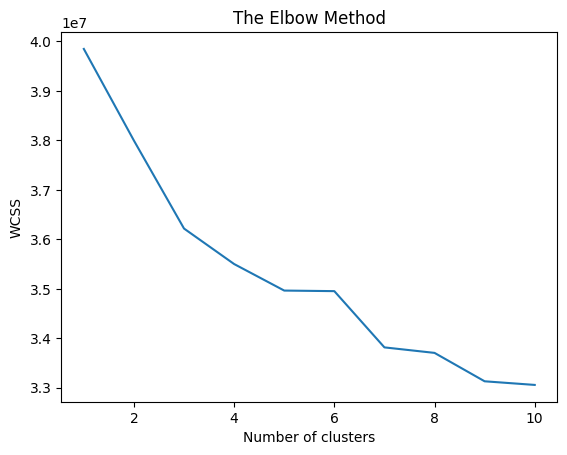

In [ ]:
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X_resampled['Risk_Cluster'] = y_kmeans


In [ ]:
X = X_resampled.drop('Risk_Cluster', axis=1)
y = X_resampled['Risk_Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
clf_risk = RandomForestClassifier(random_state=42)
clf_risk.fit(X_train, y_train)
y_pred = clf_risk.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9966725820763088
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32538
           1       1.00      1.00      1.00         1
           2       0.99      0.98      0.98      3525

    accuracy                           1.00     36064
   macro avg       1.00      0.99      0.99     36064
weighted avg       1.00      1.00      1.00     36064



In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


In [ ]:
finalDf = pd.concat([principalDf, pd.DataFrame({'Cluster': y_kmeans, 'HAI': y_resampled})], axis = 1)


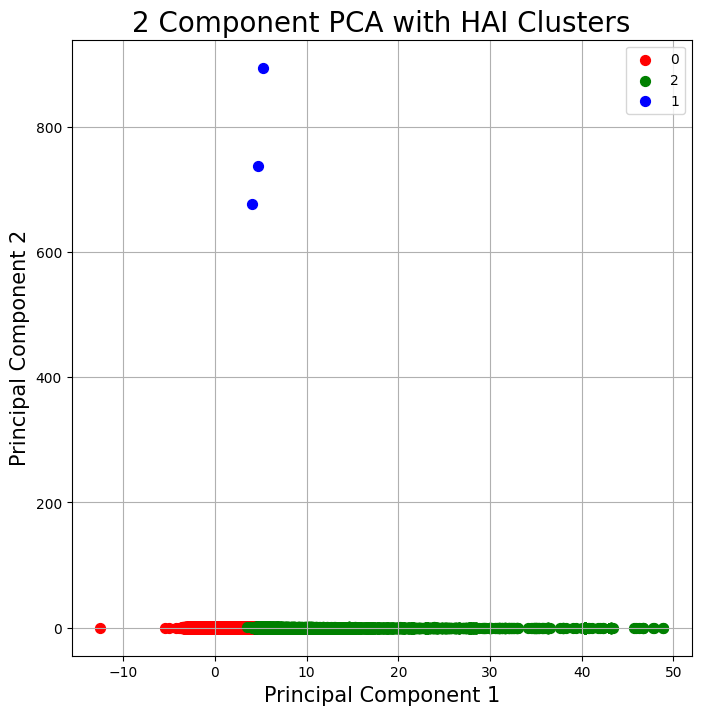

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA with HAI Clusters', fontsize = 20)

colors = ['r', 'g', 'b', 'y', 'm', 'c']
clusters = list(finalDf['Cluster'].unique())
for cluster, color in zip(clusters, colors):
    indicesToKeep = finalDf['Cluster'] == cluster
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)
ax.legend(clusters)
ax.grid()
plt.show()


In [ ]:
print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())


Before SMOTE: No HAI    1886
HAP        796
CAUTI      114
CLABSI      27
Name: HAI_category, dtype: int64
After SMOTE: No HAI    1886
HAP       1886
CAUTI     1886
CLABSI    1886
Name: HAI_category, dtype: int64


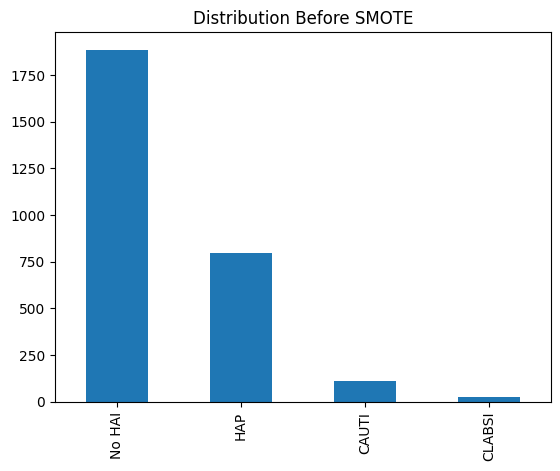

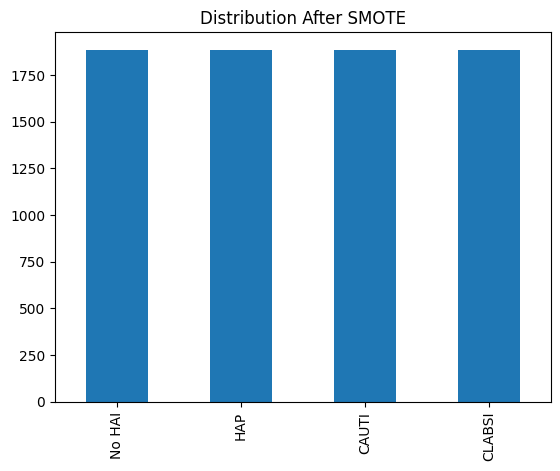

In [ ]:
import matplotlib.pyplot as plt

# Before SMOTE
y.value_counts().plot(kind='bar', title='Distribution Before SMOTE')
plt.show()

# After SMOTE
y_resampled.value_counts().plot(kind='bar', title='Distribution After SMOTE')
plt.show()


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE


df = pd.read_csv('/content/final_cohort_features_label.csv')

# Identify columns that are of object type
categorical_cols = df.select_dtypes(include='object').columns.tolist()

target_col = 'HAI_category'
categorical_cols.remove(target_col)

numerical_cols = df.columns.drop(categorical_cols + [target_col]).tolist()

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)






/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



In [ ]:
all_nan_columns = df.columns[df.isna().all()].tolist()
print(all_nan_columns)

df[all_nan_columns] = df[all_nan_columns].fillna(0)


['aboveavr_wbc_count', 'duration_from_clabsi_lab', 'phlebitis', 'blood_culture_results_from_clabsi_lab', 'oxygen_levels_from_clabsi_lab', 'abnormal_oxygen_levels_from_clabsi_lab', 'white_blood_cell_count_from_clabsi_lab', 'abnormal_wbc_count_from_clabsi_lab', 'belowavr_wbc_count_from_clabsi_lab', 'aboveavr_wbc_count_from_clabsi_lab', 'value_c_reactive_protein_from_clabsi_lab', 'abnormal_c_reactive_protein_from_clabsi_lab', 'value_procalcitonin_from_clabsi_lab', 'abnormal_procalcitonin', 'duration_from_vap_lab', 'sputum_culture_results', 'blood_culture_results_from_vap_lab', 'oxygen_levels_from_vap_lab', 'abnormal_oxygen_levels_from_vap_lab', 'white_blood_cell_count_from_vap_lab', 'abnormal_wbc_count_from_vap_lab', 'belowavr_wbc_count_from_vap_lab', 'aboveavr_wbc_count_from_vap_lab', 'value_c_reactive_protein_from_vap_lab', 'abnormal_c_reactive_protein_from_vap_lab', 'value_procalcitonin_from_vap_lab', 'abnormal_procalcitonin_from_vap_lab']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
missing_data_after = df.isnull().sum()
print(missing_data_after[missing_data_after > 0])


HAI_category    1
dtype: int64


In [ ]:
mode_value = df['HAI_category'].mode()[0]
df['HAI_category'].fillna(mode_value, inplace=True)


In [ ]:

X = df.drop(target_col, axis=1)
y = df[target_col]

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())


Before SMOTE: No HAI    1886
HAP        796
CAUTI      114
CLABSI      27
Name: HAI_category, dtype: int64
After SMOTE: No HAI    1886
HAP       1886
CAUTI     1886
CLABSI    1886
Name: HAI_category, dtype: int64


# Ventilation Filteration


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/result_df_adjusted.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61155 entries, 0 to 61154
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      61155 non-null  int64  
 1   hadm_id         61155 non-null  int64  
 2   stay_id         61155 non-null  float64
 3   InvasiveDevice  61155 non-null  object 
 4   HAI_category    61155 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [ ]:


# Filtering rows where label is 'HAP'
filtered_df = df[df['HAI_category'] == 'VAP']

print(len(filtered_df))


3104


In [ ]:
filtered_df.head()

,subject_id,hadm_id,stay_id,InvasiveDevice,HAI_category
43,11724294,27383035,30563600.0,"Central Line, Ventilator",VAP
44,11724294,27383035,39803573.0,"Central Line, Ventilator",VAP
94,11553393,27418646,33550693.0,"Central Line, Ventilator",VAP
121,12439733,24739503,34043429.0,Central Line,VAP
253,17195628,27357145,34920511.0,Central Line,VAP


In [ ]:
stay_ids = filtered_df['stay_id'].tolist()


In [ ]:
from google.cloud import bigquery

# Set up BigQuery client
project_id = 'physionet-data-395322'  # Replace with your GCP project ID
client = bigquery.Client(project=project_id)

# Assuming your filtered DataFrame is named 'filtered_df'
stay_ids = filtered_df['stay_id'].tolist()

# Construct SQL query to fetch ventilator settings
query = """
SELECT *
FROM `physionet-data.mimiciv_derived.ventilator_setting`  # Replace 'your_dataset_name' with the actual dataset name
WHERE stay_id IN ({})
""".format(', '.join([str(id) for id in stay_ids]))

# Execute the query and fetch the data
query_job = client.query(query)
ventilator_df = query_job.to_dataframe()

print(ventilator_df)


        subject_id   stay_id           charttime  respiratory_rate_set  \
0         17737450  39093207 2135-03-30 13:00:00                  28.0   
1         11551927  38006137 2171-05-22 00:00:00                   NaN   
2         15862403  30886478 2166-09-29 12:00:00                  16.0   
3         15700698  34857812 2115-02-05 00:00:00                   NaN   
4         10017531  32136798 2160-01-18 11:00:00                   NaN   
...            ...       ...                 ...                   ...   
145720    18190896  39353471 2127-06-23 04:42:00                  16.0   
145721    17889152  34147846 2118-01-07 23:00:00                  16.0   
145722    11121223  38340289 2117-12-28 08:00:00                  22.0   
145723    19897344  33674041 2131-05-21 04:00:00                  20.0   
145724    17131877  35248742 2142-03-24 07:00:00                  16.0   

        respiratory_rate_total  respiratory_rate_spontaneous  minute_volume  \
0                         32.0  

In [ ]:
print(len(ventilator_df['subject_id'].unique()))

1150


In [ ]:
# Assuming your DataFrame is named df
hap_df = df[df['HAI_category'] == 'VAP']


In [ ]:
unique_subject_ids = hap_df['subject_id'].unique()


In [ ]:
print(len(unique_subject_ids))

1306


In [ ]:
import pandas as pd

# Convert the unique subject_ids to a DataFrame
unique_subject_ids_df = pd.DataFrame(unique_subject_ids, columns=['subject_id'])

# Save to a CSV file
unique_subject_ids_df.to_csv('unique_hap_subject_ids.csv', index=False)


In [ ]:
from google.cloud import bigquery

# Initialize BigQuery client
project_id = 'physionet-data-395322'  # Your GCP project ID
client = bigquery.Client(project=project_id)

# Construct the SQL query using the subject_ids from the CSV
query = """
SELECT *
FROM `physionet-data.mimiciv_derived.ventilator_setting`  # Replace 'your_dataset_name' with your actual dataset name
WHERE subject_id IN ({})
""".format(', '.join([str(id) for id in unique_subject_ids]))

# Execute the query
query_job = client.query(query)
result_df = query_job.to_dataframe()

print(result_df)


NameError: ignored

In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181905 entries, 0 to 181904
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subject_id                    181905 non-null  Int64         
 1   stay_id                       181905 non-null  Int64         
 2   charttime                     181905 non-null  datetime64[ns]
 3   respiratory_rate_set          62257 non-null   float64       
 4   respiratory_rate_total        108426 non-null  float64       
 5   respiratory_rate_spontaneous  117683 non-null  float64       
 6   minute_volume                 115845 non-null  float64       
 7   tidal_volume_set              59868 non-null   float64       
 8   tidal_volume_observed         124836 non-null  float64       
 9   tidal_volume_spontaneous      65969 non-null   float64       
 10  plateau_pressure              36646 non-null   float64       
 11  peep         

In [ ]:
print(len(result_df['subject_id'].unique()))

1188


In [ ]:
df_vent = pd.read_csv('/content/bq-results-20231028-003030-1698453049235.csv')

<ipython-input-23-638517a56f09>:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vent = pd.read_csv('/content/bq-results-20231028-003030-1698453049235.csv')


In [ ]:
df_vent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311734 entries, 0 to 311733
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subject_id                    311734 non-null  int64  
 1   stay_id                       311734 non-null  int64  
 2   charttime                     311734 non-null  object 
 3   respiratory_rate_set          107381 non-null  float64
 4   respiratory_rate_total        183756 non-null  float64
 5   respiratory_rate_spontaneous  195608 non-null  float64
 6   minute_volume                 192046 non-null  float64
 7   tidal_volume_set              103930 non-null  float64
 8   tidal_volume_observed         204640 non-null  float64
 9   tidal_volume_spontaneous      107205 non-null  float64
 10  plateau_pressure              67741 non-null   float64
 11  peep                          204836 non-null  float64
 12  fio2                          254437 non-nul

In [ ]:
print(len(df_vent['subject_id'].unique()))

4509


In [ ]:
import pandas as pd

In [ ]:
dfg = pd.read_csv('/content/bq-results-20231028-012523-1698456358371.csv')

<ipython-input-6-be65d27ed655>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  dfg = pd.read_csv('/content/bq-results-20231028-012523-1698456358371.csv')


In [ ]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968313 entries, 0 to 968312
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subject_id                    968313 non-null  int64  
 1   stay_id                       968313 non-null  int64  
 2   charttime                     968313 non-null  object 
 3   respiratory_rate_set          257085 non-null  float64
 4   respiratory_rate_total        419710 non-null  float64
 5   respiratory_rate_spontaneous  404249 non-null  float64
 6   minute_volume                 376177 non-null  float64
 7   tidal_volume_set              241874 non-null  float64
 8   tidal_volume_observed         424058 non-null  float64
 9   tidal_volume_spontaneous      197598 non-null  float64
 10  plateau_pressure              157085 non-null  float64
 11  peep                          422829 non-null  float64
 12  fio2                          759062 non-nul

In [ ]:
print(len(dfg['subject_id'].unique()))

4356


### More Exploration

In [ ]:
from google.cloud import bigquery

# Initialize BigQuery client
project_id = 'physionet-data-395322'  # Your GCP project ID
client = bigquery.Client(project=project_id)

# VAP only query
sql = f"""
SELECT
    d.subject_id,
    d.hadm_id,
    i.stay_id,
    d.icd_code,
    dicd.long_title,
    'VAP' AS HAI_Type
FROM
    `physionet-data.mimiciv_hosp.diagnoses_icd` d
LEFT OUTER JOIN
    `physionet-data.mimiciv_icu.icustays` i ON d.hadm_id = i.hadm_id
LEFT OUTER JOIN
    `physionet-data.mimiciv_hosp.d_icd_diagnoses` dicd ON d.icd_code = dicd.icd_code
WHERE
    d.icd_code LIKE 'J95851' OR
    d.icd_code LIKE '99731%'
"""

query_job = client.query(sql)

vap_patients = query_job.to_dataframe()
vap_patients.head()


,subject_id,hadm_id,stay_id,icd_code,long_title,HAI_Type
0,14998916,22487973,37386043,99731,Ventilator associated pneumonia,VAP
1,11851057,28788118,33660291,J95851,Ventilator associated pneumonia,VAP
2,14361933,27570734,30080185,J95851,Ventilator associated pneumonia,VAP
3,14361933,27570734,32080893,J95851,Ventilator associated pneumonia,VAP
4,14361933,27570734,34571608,J95851,Ventilator associated pneumonia,VAP


In [ ]:
vap_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  2041 non-null   Int64 
 1   hadm_id     2041 non-null   Int64 
 2   stay_id     2033 non-null   Int64 
 3   icd_code    2041 non-null   object
 4   long_title  2041 non-null   object
 5   HAI_Type    2041 non-null   object
dtypes: Int64(3), object(3)
memory usage: 101.8+ KB


In [ ]:
print(len(vap_patients['subject_id'].unique()))

1548
